<a href="https://www.kaggle.com/code/caiomelo22/21-22-champions-league-players-analysis?scriptVersionId=120235546" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 1. Introduction
    
<p>In this notebook, I'm hoping to analyze the players who played in the 21/22 edition of the Champions League. We're going to analyze position by position and, in the end, we're going to build our own team of the tournament based only on stats. Hope you enjoy and feel free to leave a comment to agree/disagree with my analysis. Suggestions are also very welcome!<p/>

# 2. Data Loading

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import os

In the next cell, we are going to initialize a dataframe with general information from all players. We selected the key_stats.csv because it contains the information of all players, no matter the position.

In [2]:
files_base_dir = '/kaggle/input/ucl-202122-uefa-champions-league'
all_players_file = 'key_stats'

players_df = pd.read_csv(f"{files_base_dir}/{all_players_file}.csv").set_index(['player_name', 'club', 'position']).stack().unstack()

In [3]:
players_df.head()

,,,minutes_played,match_played,goals,assists,distance_covered
player_name,club,position,,,,,
Aaronson,Salzburg,Midfielder,715,8,0,2,103.5
Abubakari,Malmö,Forward,116,4,0,0,15.3
Acuña,Sevilla,Defender,379,5,0,0,43.2
Adams,Leipzig,Midfielder,292,5,0,0,38.9
Adamu,Salzburg,Forward,231,8,1,0,32.6


In [4]:
players_df.columns

Index(['minutes_played', 'match_played', 'goals', 'assists',
       'distance_covered'],
      dtype='object')

Now, we are going to unite all of the information in the csv files into one single dataframe. For that, we are going to concatenate each of the csvs based on a ['player_name', 'club', 'position'] index.

In [5]:
files = ['attacking', 'defending', 'goalkeeping', 'attempts', 'disciplinary', 'distributon', 'goals']

for file in files:
    players_extracted = pd.read_csv(f"{files_base_dir}/{file}.csv")
    players_extracted = players_extracted.set_index(['player_name', 'club', 'position']).stack().unstack()
    
    players_extracted.drop('serial', axis=1, inplace=True, errors='ignore')
    for col in list(players_df.columns):
        players_extracted.drop(col, axis=1, inplace=True, errors='ignore')
    
    players_df = pd.concat([
        players_df,
        players_extracted
    ], axis=1)
    
players_df.reset_index(inplace=True)
players_df.fillna(0.0, inplace=True)

In [6]:
players_df.head()

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered,corner_taken,offsides,...,cross_attempted,cross_complted,freekicks_taken,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties
0,Aaronson,Salzburg,Midfielder,715.0,8.0,0.0,2.0,103.5,4.0,5.0,...,18.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Abubakari,Malmö,Forward,116.0,4.0,0.0,0.0,15.3,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Acuña,Sevilla,Defender,379.0,5.0,0.0,0.0,43.2,0.0,0.0,...,30.0,12.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Adams,Leipzig,Midfielder,292.0,5.0,0.0,0.0,38.9,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Adamu,Salzburg,Forward,231.0,8.0,1.0,0.0,32.6,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [7]:
players_df.columns

Index(['player_name', 'club', 'position', 'minutes_played', 'match_played',
       'goals', 'assists', 'distance_covered', 'corner_taken', 'offsides',
       'dribbles', 'balls_recoverd', 'tackles', 't_won', 't_lost',
       'clearance_attempted', 'saved', 'conceded', 'saved_penalties',
       'cleansheets', 'punches made', 'total_attempts', 'on_target',
       'off_target', 'blocked', 'fouls_committed', 'fouls_suffered', 'red',
       'yellow', 'pass_accuracy', 'pass_attempted', 'pass_completed',
       'cross_accuracy', 'cross_attempted', 'cross_complted',
       'freekicks_taken', 'right_foot', 'left_foot', 'headers', 'others',
       'inside_area', 'outside_areas', 'penalties'],
      dtype='object')

In [8]:
players_df.describe()

,minutes_played,match_played,goals,assists,corner_taken,offsides,dribbles,balls_recoverd,tackles,t_won,...,cross_attempted,cross_complted,freekicks_taken,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties
count,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,...,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000
mean,329.845539,5.062583,0.490013,0.374168,0.782956,0.332889,2.105193,13.697736,3.950732,1.727031,...,5.145140,1.380826,4.430093,0.237017,0.169108,0.079893,0.005326,0.442077,0.050599,0.047936
std,248.883454,2.739357,1.310305,0.843689,3.341780,1.240848,6.611776,14.799026,4.905667,2.503076,...,8.819159,2.844664,6.567808,0.806483,0.636159,0.333079,0.072835,1.227045,0.268520,0.283489
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,114.500000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,300.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,2.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,490.500000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.500000,6.000000,2.000000,...,7.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1230.000000,13.000000,15.000000,7.000000,36.000000,10.000000,83.000000,76.000000,35.000000,18.000000,...,81.000000,24.000000,53.000000,11.000000,8.000000,3.000000,1.000000,13.000000,3.000000,3.000000


# 3. Forwards

Now, we are going to scatterplot the goals/shots for fowards

In [9]:
def plot_scatter(data, x, y, xlabel, ylabel, title='', hue=None, height=3, text_spacing=0.3):
    fgrid = sns.lmplot(data=data, x=x, y=y, hue=hue, height=height, aspect=1.5)
    ax = fgrid.axes[0,0]
    
    plt.title(f"{title} {xlabel}/{ylabel}")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    for i, row in data.iterrows():
        ax.text(row[x] + text_spacing, row[y], row['player_name'], fontsize=7)


In [10]:
forwards_df = players_df[(players_df['goals'] > 0) & (players_df['position'] == 'Forward')].reset_index(drop=True)
forward_cols = ['player_name', 'goals', 'offsides', 'assists']
forwards_df.loc[:, forward_cols].head()

,player_name,goals,offsides,assists
0,Adamu,1.0,0.0,0.0
1,Adeyemi,3.0,0.0,1.0
2,Alcácer,1.0,0.0,0.0
3,Alexis Sánchez,1.0,3.0,1.0
4,André Silva,3.0,9.0,2.0


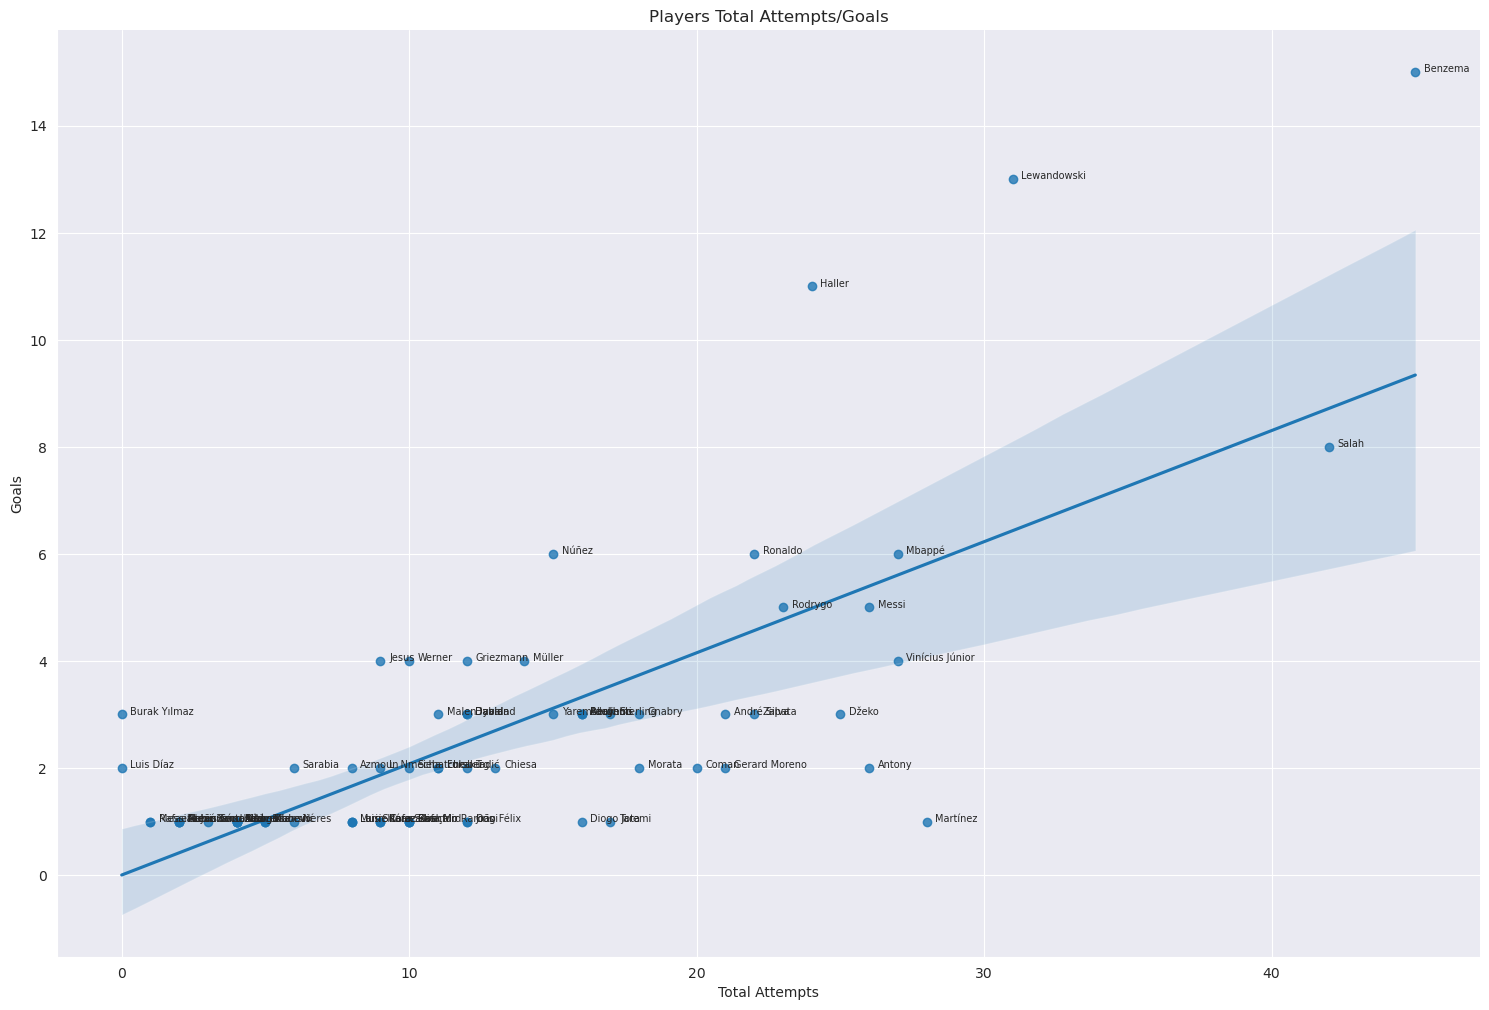

In [11]:
plot_scatter(forwards_df, 'total_attempts', 'goals', xlabel='Total Attempts', ylabel='Goals', title='Players', height=10)

By looking at these charts, a few players that are worth highlighting are Benzema, Lewandowski and Haller, whose goals tally were way above the projected line for fowards.

A famous lowlight was Martinez. If you saw the 2022 World Cup, Martinez being under the projected line was not a surprise, even though this numbers were in the Champions League that preceded the World Cup.

Let's take a look at the fowards goals when we compare them with their offsides.

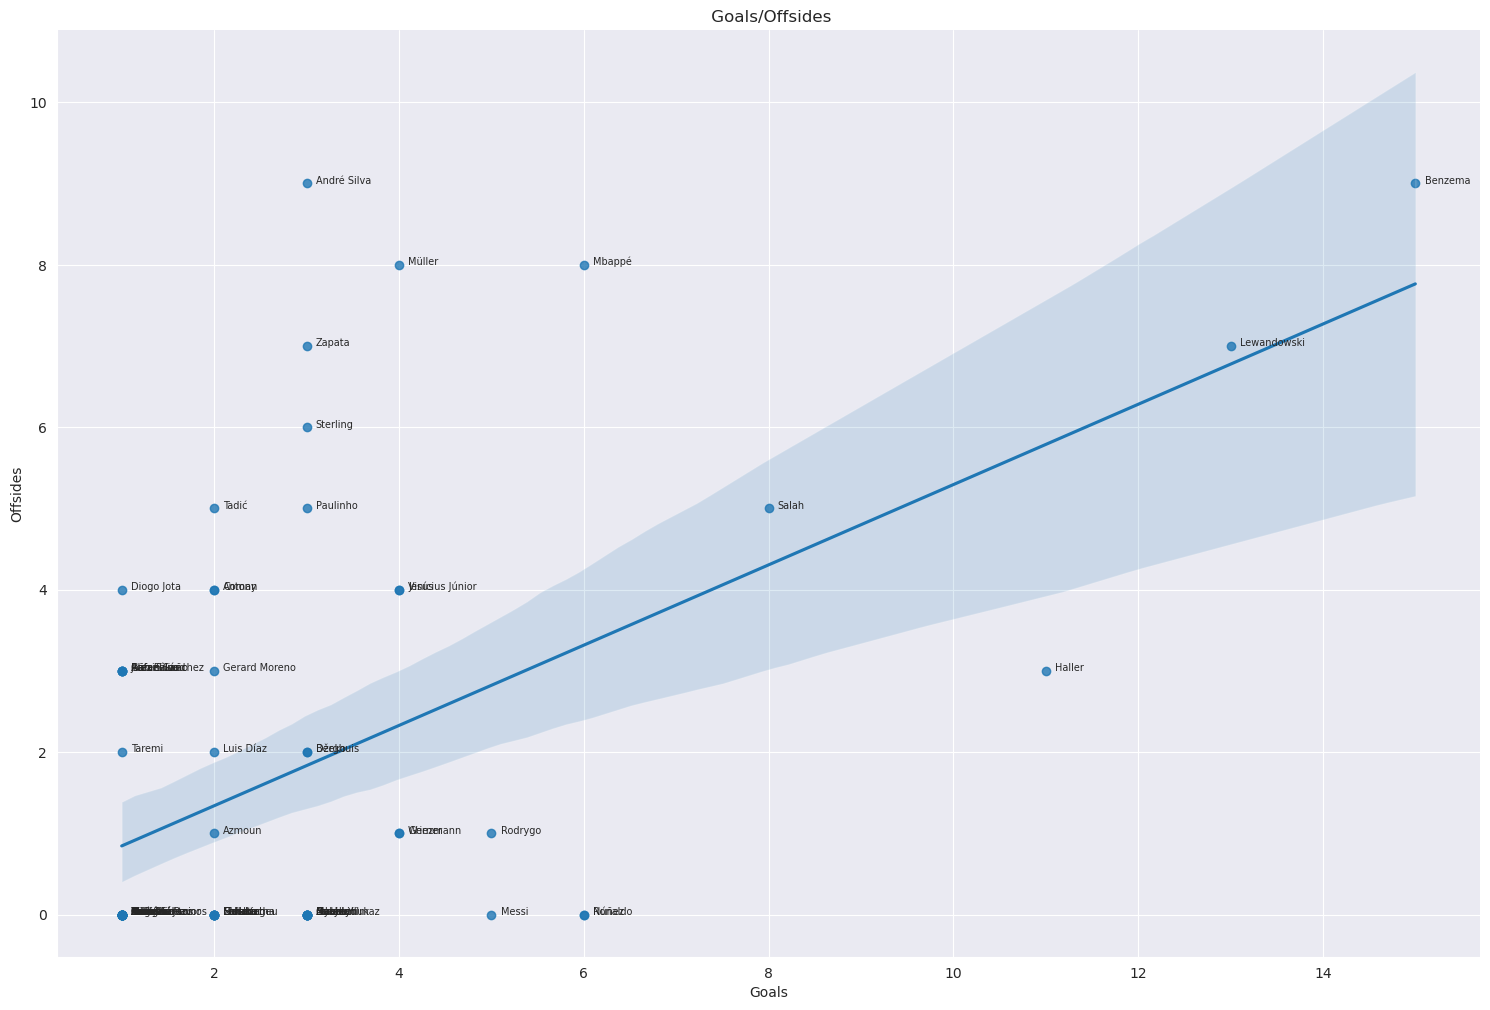

In [12]:
plot_scatter(forwards_df, 'goals', 'offsides', xlabel='Goals', ylabel='Offsides', height=10, text_spacing=0.1)

When we look at this chart, a couple of things stood out for me.

1. Mbappé, which is one of the best players in the world, is way above the projected line. That means that he gets offside way more than he should, based on his goals contribution.
2. Haller, the third best scorer in the competition, had only 3 offsides. That shows that he converts his opportunities and shows awareness of his positioning, something that an elite striker must have.

We know that football is not only about the goals, but also about how you can assist your teammates to score as well. Let's take a look at this two stats.

In [13]:
forwards_df['goal_contributions'] = forwards_df['goals'] + forwards_df['assists']
forward_cols.append('goal_contributions')
forwards_df.loc[:, forward_cols].sort_values('goal_contributions', ascending=False).head()

,player_name,goals,offsides,assists,goal_contributions
35,Lewandowski,13.0,7.0,3.0,16.0
8,Benzema,15.0,9.0,1.0,16.0
29,Haller,11.0,3.0,1.0,12.0
66,Vinícius Júnior,4.0,4.0,6.0,10.0
41,Mbappé,6.0,8.0,4.0,10.0


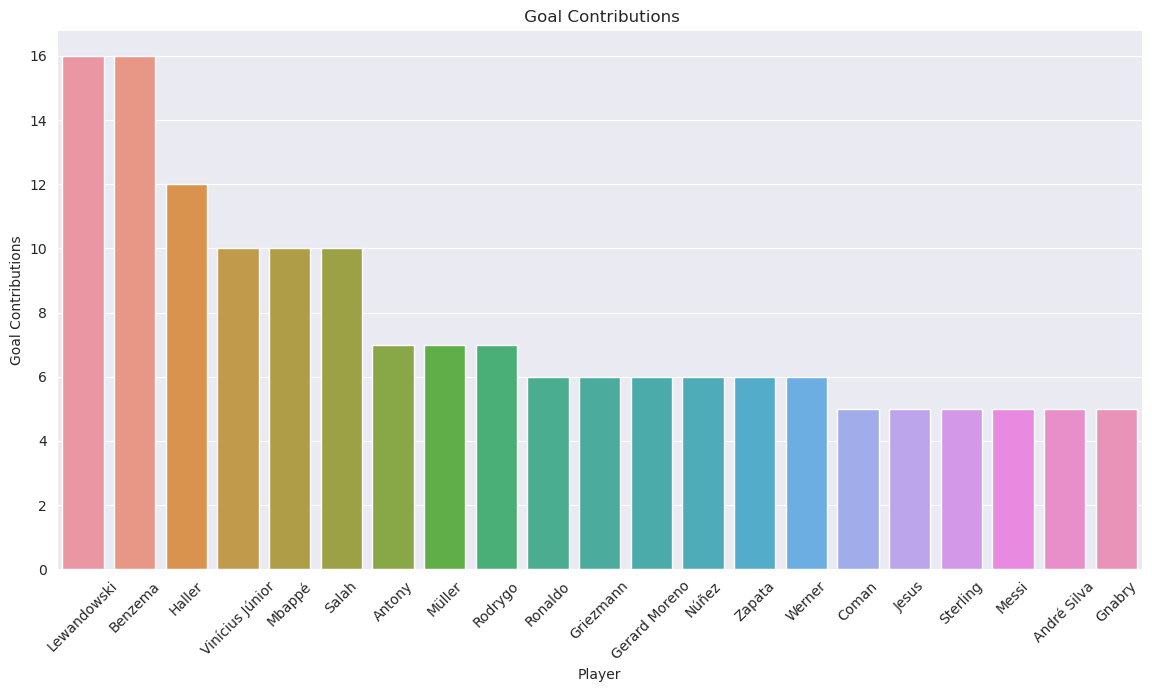

In [14]:
def plot_bar(data, y, ylabel, title=''):
    plt.figure(figsize=(14,7))
    bar_plot = sns.barplot(data=data, x='player_name', y=y)
    
    plt.title(f"{title} {ylabel}")
    plt.xlabel('Player')
    plt.ylabel(ylabel)
    
    for item in bar_plot.get_xticklabels():
        item.set_rotation(45)
    
forwards_df = forwards_df.sort_values('goal_contributions', ascending=False).reset_index(drop=True)
plot_bar(forwards_df.loc[:20, :], 'goal_contributions', ylabel='Goal Contributions')

Okay. When we compared the goals scored by each player, we used metrics like attempts and offsides to check how much they've tryed to score. Now that we are looking at goals + assists, I think it's fair to use minutes played to see their efficiencies, since teams reached further stages and there are players that played more than others. Also, let's set a threshold of minutes, so that we can get only the players that played at least a couple of games.

In [15]:
min_played_threshold = 180
forwards_df = forwards_df[forwards_df['minutes_played'] > min_played_threshold].reset_index(drop=True)

In [16]:
forwards_df['goal_contributions_by_min'] = forwards_df['goal_contributions'] / forwards_df['minutes_played']
forward_cols.append('goal_contributions_by_min')
forwards_df.loc[:, forward_cols].head()

,player_name,goals,offsides,assists,goal_contributions,goal_contributions_by_min
0,Lewandowski,13.0,7.0,3.0,16.0,0.018265
1,Benzema,15.0,9.0,1.0,16.0,0.014467
2,Haller,11.0,3.0,1.0,12.0,0.017964
3,Vinícius Júnior,4.0,4.0,6.0,10.0,0.008340
4,Mbappé,6.0,8.0,4.0,10.0,0.014859


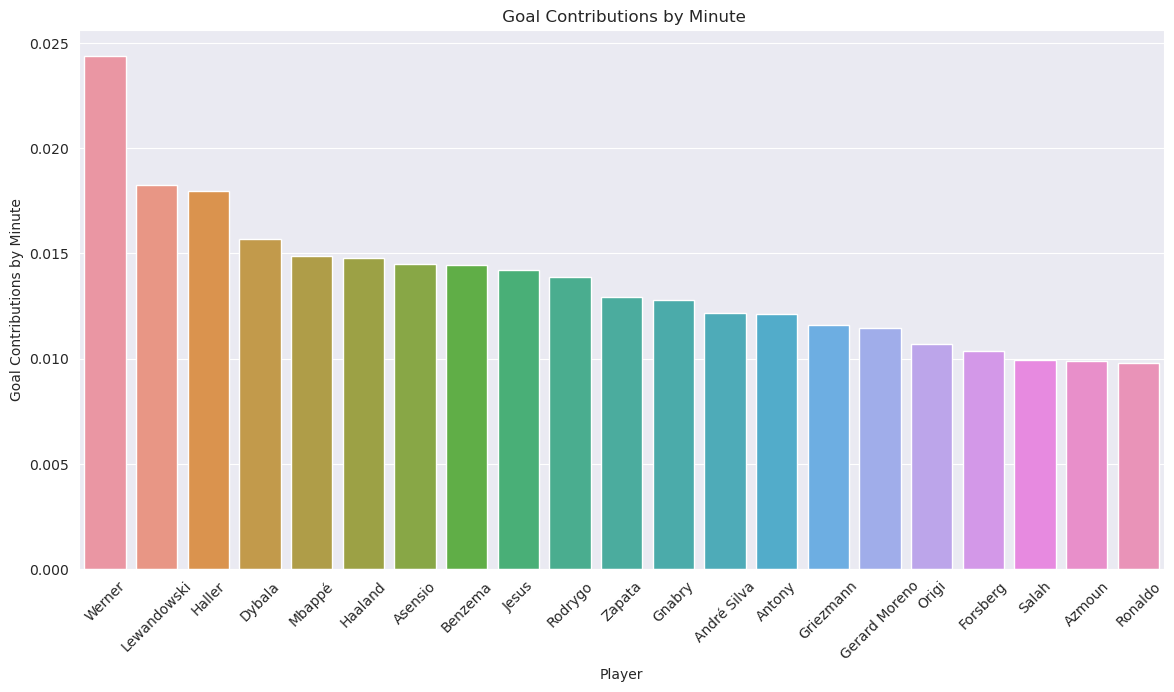

In [17]:
forwards_df = forwards_df.loc[:, forward_cols].sort_values('goal_contributions_by_min', ascending=False).reset_index(drop=True)
plot_bar(forwards_df.loc[:20, :], 'goal_contributions_by_min', ylabel='Goal Contributions by Minute')

Okay! Now we are getting somewhere. I gotta tell you that I'm surprised to see Werner up there with some margin to the second place. Well, I think Chelsea really made a mistake by getting him transfered after this performance in the Champions League.

# 4. Midfielders

Let's take a look at the passing stats for the midfielders.

In [18]:
midfielders_df = players_df[players_df['position'] == 'Midfielder'].sort_values('pass_accuracy', ascending=False).reset_index(drop=True)
midfielder_cols = ['player_name', 'club', 'pass_accuracy', 'pass_attempted', 'pass_completed', 'assists']
midfielders_df.loc[:, midfielder_cols].head()

,player_name,club,pass_accuracy,pass_attempted,pass_completed,assists
0,Erokhin,Zenit,98.0,27.0,26.0,0.0
1,J. Timber,Ajax,95.8,497.0,474.0,0.0
2,Nianzou,Bayern,94.5,199.0,192.0,0.0
3,Maycon,Shakhtar Donetsk,94.5,395.0,373.0,0.0
4,Marcos Antônio,Shakhtar Donetsk,94.4,234.0,224.0,0.0


Looks like we might have a similar issue that we had with players that don't play as much. Let's set a threshold of minimum passes so that we can get players that are playing constantly.

In [19]:
pass_threshold = midfielders_df.pass_attempted.mean()
print('Pass threshold:', pass_threshold)

Pass threshold: 162.0731707317073


In [20]:
midfielders_df = midfielders_df[midfielders_df['pass_attempted'] > pass_threshold].sort_values('pass_accuracy', ascending=False).reset_index(drop=True)
midfielders_df.loc[:, midfielder_cols].head()

,player_name,club,pass_accuracy,pass_attempted,pass_completed,assists
0,J. Timber,Ajax,95.8,497.0,474.0,0.0
1,Maycon,Shakhtar Donetsk,94.5,395.0,373.0,0.0
2,Nianzou,Bayern,94.5,199.0,192.0,0.0
3,Marcos Antônio,Shakhtar Donetsk,94.4,234.0,224.0,0.0
4,Rodri,Man. City,94.2,806.0,760.0,0.0


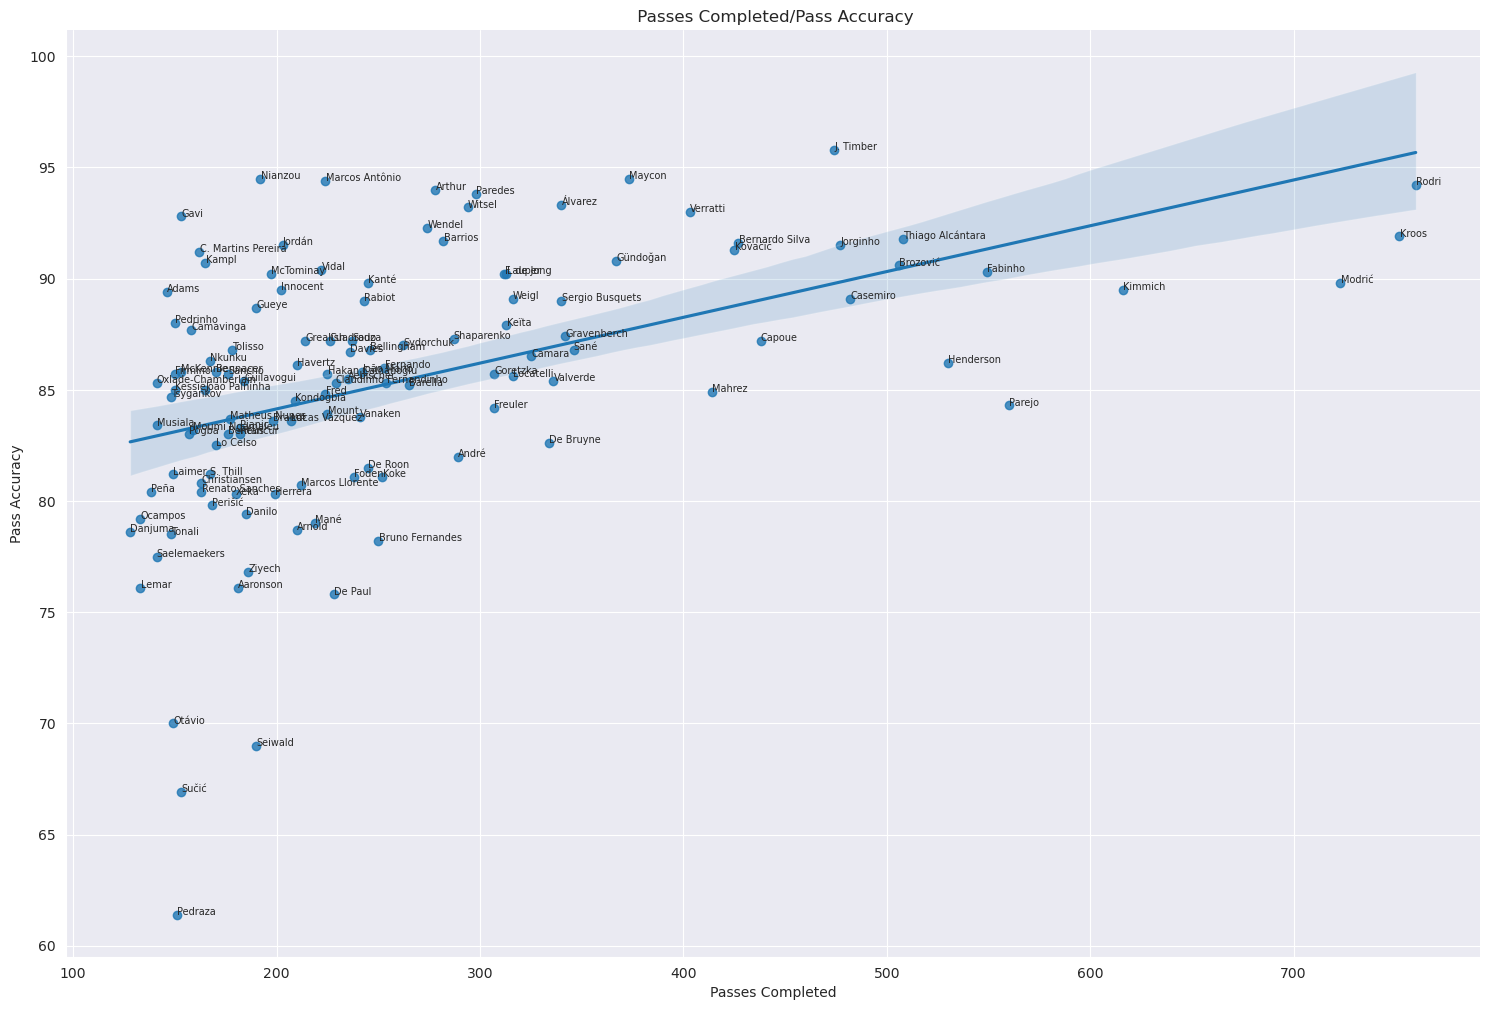

In [21]:
plot_scatter(midfielders_df, 'pass_completed', 'pass_accuracy', xlabel='Passes Completed', ylabel='Pass Accuracy', height=10, text_spacing=0.1)

I think there are a few takes here that I would like to talk about. When we look at players that play in the first part of the midfield, such as central defending mids and box to box mids, they tend to distribute the game and not take that many risky passes. These type of players that play for the biggest clubs, like Rodri, Kroos, Modric and Kimmich, usually are very involved in the game, so they tend to make a lot of passes with high precision. 

When we look at players that play in a more ofensive role, they tend to take more risk when it comes to passing. If you ask me, even though these type of players, such as Bruno Fernandes and De Bruyne, do not complete as many passes with a precision as high as the ones mentioned before, they'll probably be better when it comes to assisting goals, which is what we are about to analyze next.

In this dataset, we do not have the information about the specific passes made to create real scoring opportunities, so we are going to look at the assists against the minutes played, and then compare to the chart that we just saw.

In [22]:
midfielders_df['assists_per_min'] = midfielders_df['assists'] / midfielders_df['minutes_played']
midfielder_cols.append('assists_per_min')
midfielders_df = midfielders_df.sort_values('assists_per_min', ascending=False).reset_index(drop=True)
midfielders_df.loc[:, midfielder_cols].head()

,player_name,club,pass_accuracy,pass_attempted,pass_completed,assists,assists_per_min
0,Bruno Fernandes,Man. United,78.2,324.0,250.0,7.0,0.013462
1,João Mário,Benfica,85.8,268.0,242.0,4.0,0.008114
2,Pjanic,Beşiktaş,83.3,216.0,182.0,2.0,0.007663
3,Sané,Bayern,86.8,398.0,346.0,6.0,0.007519
4,Bellingham,Dortmund,86.8,281.0,246.0,3.0,0.005964


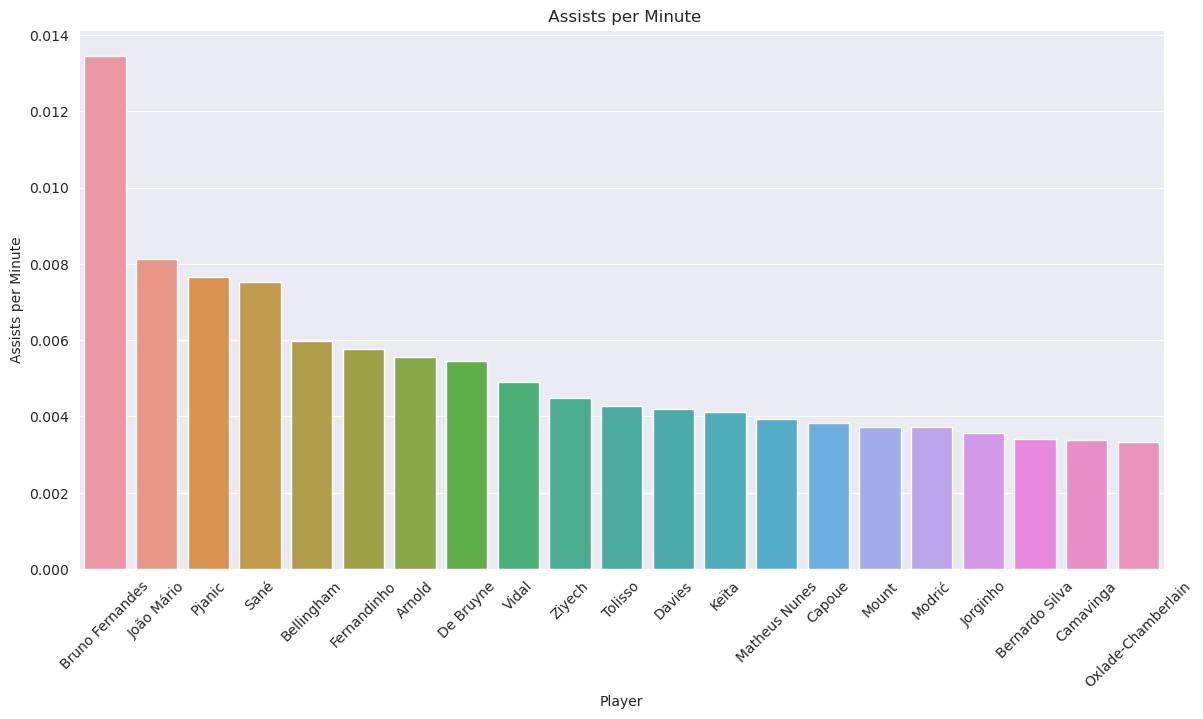

In [23]:
plot_bar(midfielders_df.loc[:20, :], 'assists_per_min', ylabel='Assists per Minute')

Wow! What did I tell you? In the top 10 of most assist per minute, we see both of the players that I mentioned before, Bruno Fernandes and Kevin de Bruyne. Another interesting thing is that Modric, who is the third player with the most passes in the competition, also appears in the top 20 of assist per minute. That shows what a good player he is.

Let's take a look at the previous passing chart but only with the top 20 assist per minute players.

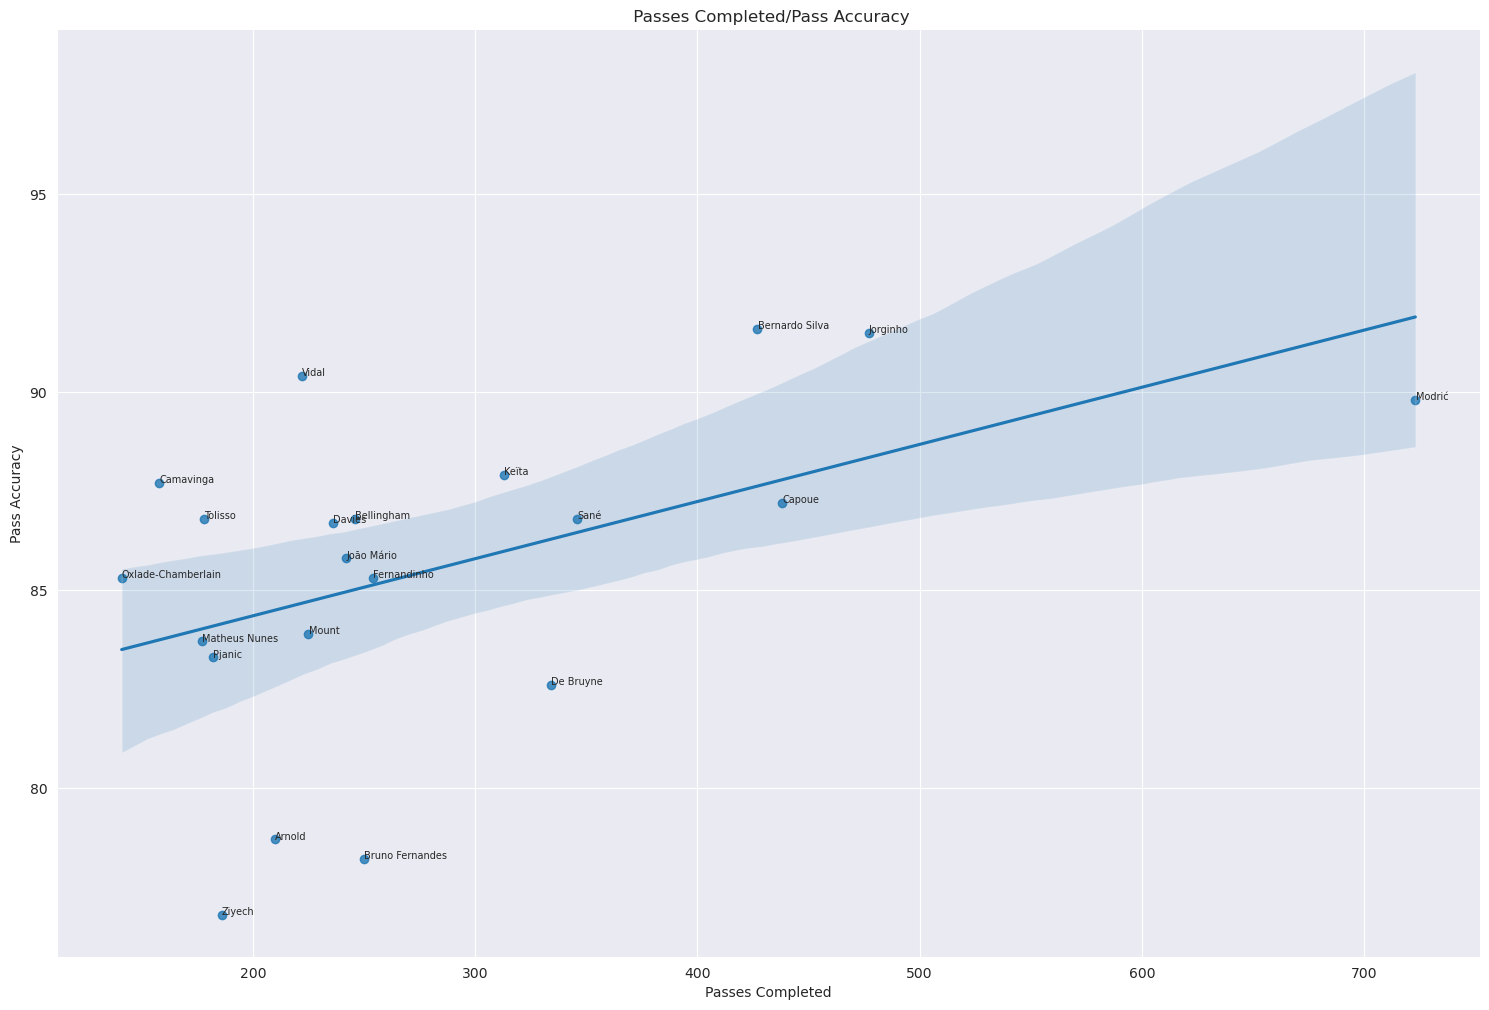

In [24]:
plot_scatter(midfielders_df.loc[:20, :], 'pass_completed', 'pass_accuracy', xlabel='Passes Completed', ylabel='Pass Accuracy', height=10, text_spacing=0.1)

Even though Modric is below the projected line for accuracy/passes completed, I think that his relative high number of assists with his passing precision/distribution pretty much shows that he is a complete midfielder.

One hidden gem when analyzing passing is João Mário. He was the second best in assists per minute and was also above the projected line for passing distribution. A really good player from the portuguese league.

# 5. Defenders

Now let's look at some defenders. First of all, we are going to create a column to store the clearences per minute by a player and a tackle success percentage.

In [25]:
players_df['clearances_per_min'] = players_df['clearance_attempted'] / players_df['minutes_played']
players_df['tackle_pct'] = (players_df['t_won'] * 100) / players_df['tackles']

defender_cols = ['player_name', 't_won', 'tackles', 'fouls_committed', 'tackle_pct', 'clearance_attempted', 'clearances_per_min']

defenders_df = players_df[(players_df['position'] == 'Defender') & (players_df['minutes_played'] >= min_played_threshold)].reset_index(drop=True)
defenders_df.loc[:, defender_cols].head()

,player_name,t_won,tackles,fouls_committed,tackle_pct,clearance_attempted,clearances_per_min
0,Acuña,6.0,8.0,12.0,75.000000,4.0,0.010554
1,Ahmedhodžić,3.0,6.0,6.0,50.000000,24.0,0.058111
2,Akanji,2.0,5.0,1.0,40.000000,12.0,0.026667
3,Aké,3.0,3.0,3.0,100.000000,19.0,0.058642
4,Alaba,12.0,18.0,9.0,66.666667,28.0,0.026923


I'm thinking that there is a very low number of tackles made by some of this first five players. Let's see what is the average tackles made by a player in this competition.

In [26]:
avg_tackles = defenders_df['tackles'].mean()
print('Avg tackles:', avg_tackles)

Avg tackles: 6.228571428571429


Okay, now let's filter the defenders by only selecting the ones that've got more than the avg number of tackles. That way we can select only the players that've had a lot of work on defense.

In [27]:
defenders_df = defenders_df[defenders_df['tackles'] > avg_tackles].reset_index(drop=True)
defenders_df.loc[:, defender_cols].head()

,player_name,t_won,tackles,fouls_committed,tackle_pct,clearance_attempted,clearances_per_min
0,Acuña,6.0,8.0,12.0,75.000000,4.0,0.010554
1,Alaba,12.0,18.0,9.0,66.666667,28.0,0.026923
2,Albiol,6.0,9.0,9.0,66.666667,62.0,0.059330
3,Alex Sandro,4.0,11.0,8.0,36.363636,11.0,0.019892
4,Bastoni,2.0,7.0,11.0,28.571429,18.0,0.027027


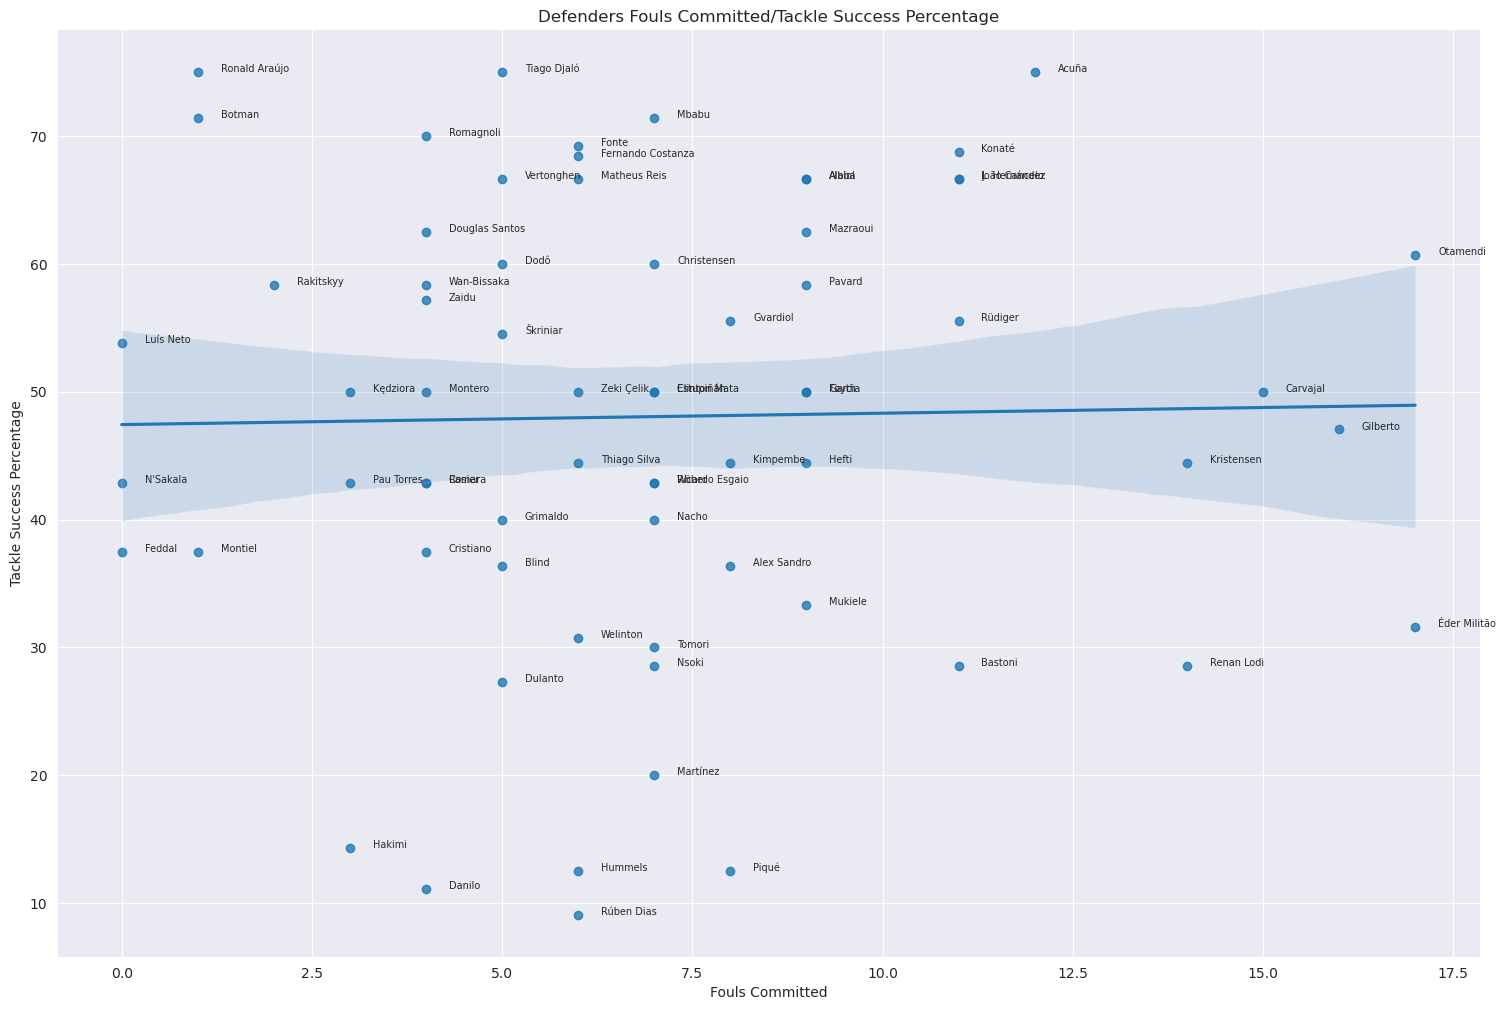

In [28]:
plot_scatter(defenders_df, 'fouls_committed', 'tackle_pct', xlabel='Fouls Committed', ylabel='Tackle Success Percentage', title='Defenders', height=10)

We're looking for players with great tackle success percentage and a low number of fouls committed. For now, I think Ronald Araújo and Botman are the ones to highlight. If you're following them in the 2022/23 season for Barcelona and Newcastle, respectively, we should not be surprised by this result.

Now let's take a look at the clearances made per minute.

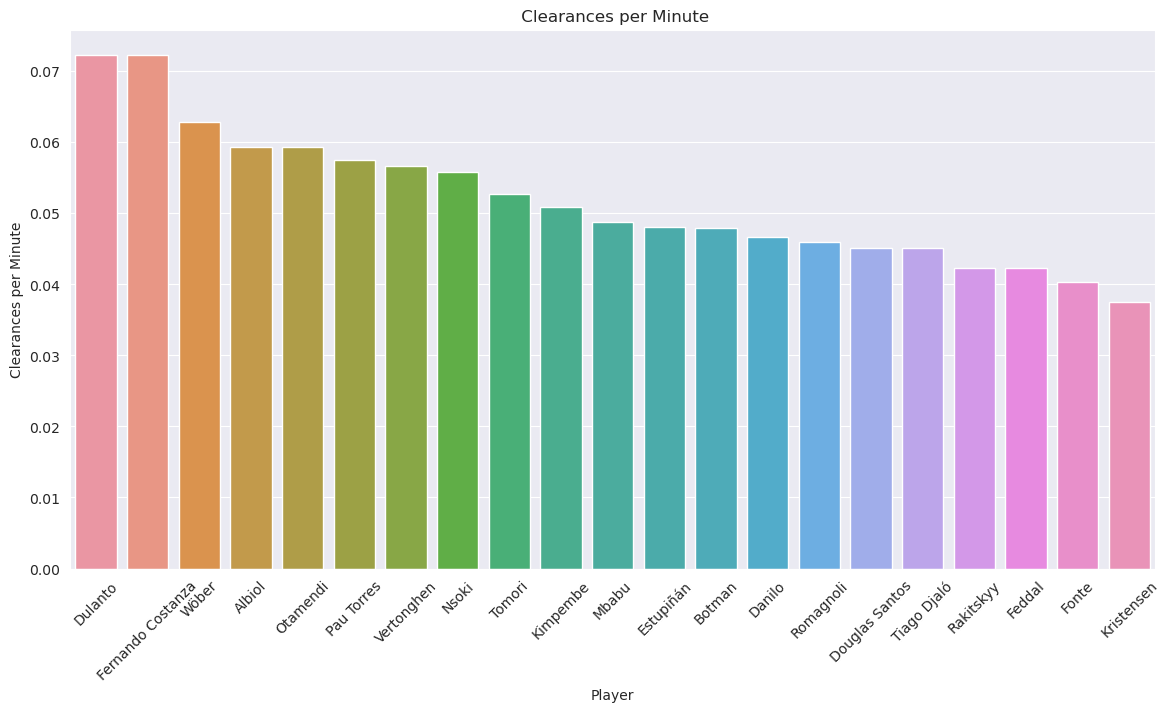

In [29]:
defenders_df = defenders_df.sort_values('clearances_per_min', ascending=False).reset_index(drop=True)
plot_bar(defenders_df.loc[:20, :], 'clearances_per_min', ylabel='Clearances per Minute')

I don't know if you remember, but this edition of the Champions League was when Sheriff, a small club from Moldavia, surprised everyone when they beat Real Madrid in Santiago Bernabeu. One of the beautiful histories of this edition and I'm happy to see Fernando Costanza representing that performance in the chart above.

Also, we can highlight players that did well in the tackle/fouls chart too. Players like Albiol, Botman (again), Romagnoli, Djaló deserve some props.

# 6. Goalkeepers

Now let's look at the goalkeepers. Essentially, we want to look at the keepers that made the most saves without conceding as much. Pretty simple, right? If I had to guess, I'd say that Courtois will be the one to highlight.

In [30]:
keepers_df = players_df[players_df['position'] == 'Goalkeeper']
keeper_cols = ['player_name', 'club', 'saved', 'conceded', 'saved_penalties', 'cleansheets']
keepers_df.loc[:, keeper_cols].head()

,player_name,club,saved,conceded,saved_penalties,cleansheets
7,Adán,Sporting CP,17.0,13.0,0.0,2.0
23,Alisson Becker,Liverpool,15.0,14.0,0.0,4.0
35,Athanasiadis,Sheriff,29.0,8.0,0.0,1.0
73,Bounou,Sevilla,14.0,5.0,0.0,2.0
74,Boyko,Dynamo Kyiv,4.0,0.0,0.0,1.0


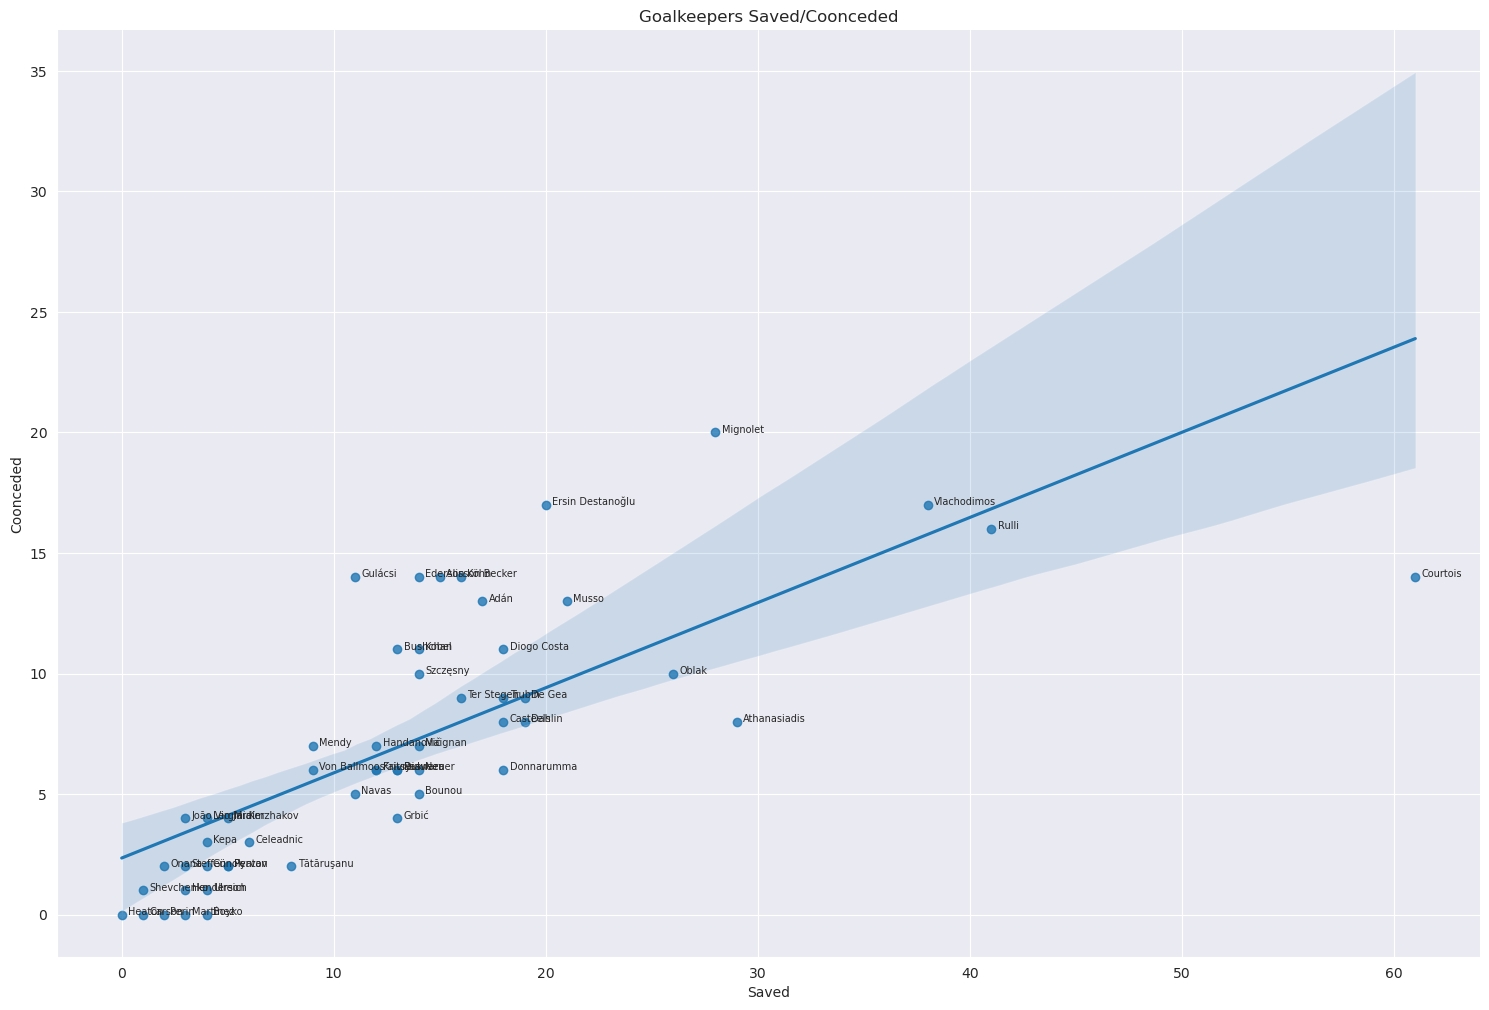

In [31]:
plot_scatter(keepers_df, 'saved', 'conceded', xlabel='Saved', ylabel='Coonceded', title='Goalkeepers', height=10)

Well, no surprises there. One hidden gem there is Athanasiadis, also representing Sheriff, which is below the projected line with a considerable number of saves.

Just to go a little deeper, let's look at the keepers that saved the most penalties.

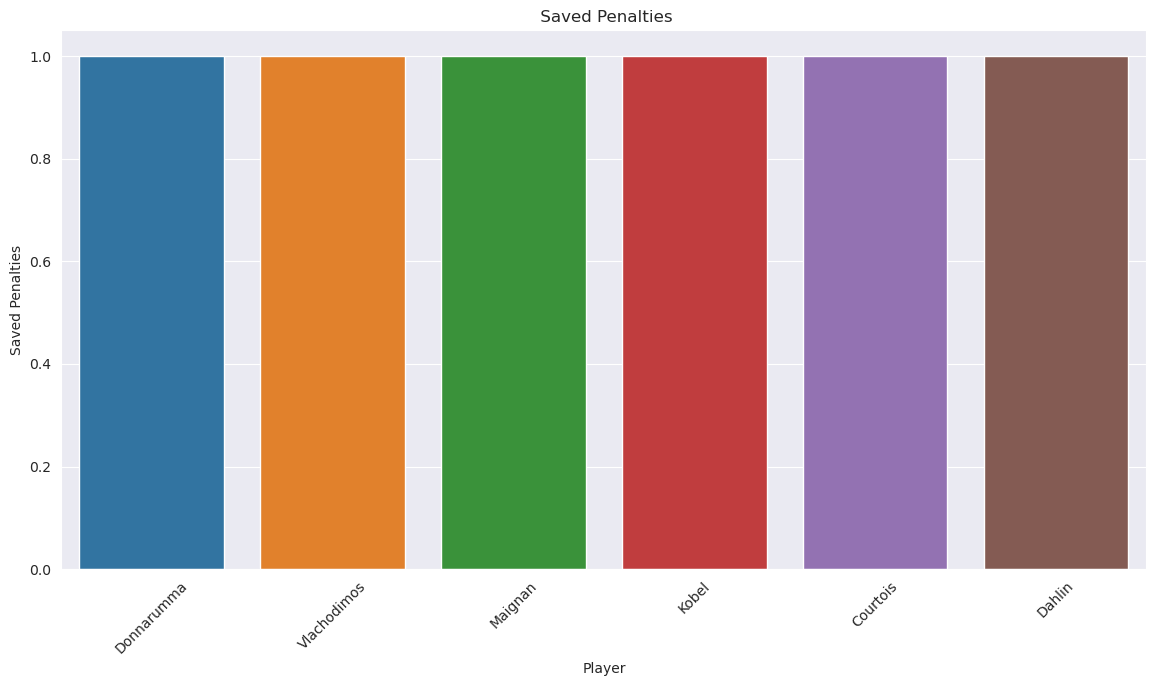

In [32]:
keepers_df = keepers_df.sort_values('saved_penalties', ascending=False).reset_index(drop=True)
plot_bar(keepers_df.loc[:5, :], 'saved_penalties', ylabel='Saved Penalties')

Only 5 keepers saved penalties in the competition, and guess what? Courtois is up there.

# 7. Team of the Tournament

This has been fun! To end it on an interesting note, let's build a team of the tournament based on everything that we've analyzed.

I'm gonna build a team with the 4-3-3 formation. For the attackers, I'm going to be considering scoring, for the midfielders, passing/assisting, and for the defenders, well, defending. Oh, and we already know that Courtois is going to be the keeper, so we don't have to worry about that.

Also, we are going to stick to the statistics, not worrying about who got furthest and who performed best in the most important moments.

In [33]:
tott_keepers = ['Courtois']
tott_keepers_df = keepers_df[keepers_df['player_name'].isin(tott_keepers)].reset_index(drop=True)
tott_keepers_df.loc[:, keeper_cols].head()

,player_name,club,saved,conceded,saved_penalties,cleansheets
0,Courtois,Real Madrid,61.0,14.0,1.0,5.0


In [34]:
tott_defenders = [
    'Botman',
    'Ronald Araújo',
    'Fernando Costanza',
    'Tiago Djaló',
]
tott_defenders_df = defenders_df[defenders_df['player_name'].isin(tott_defenders)].reset_index(drop=True)
tott_defenders_df.loc[:, defender_cols].head()

,player_name,t_won,tackles,fouls_committed,tackle_pct,clearance_attempted,clearances_per_min
0,Fernando Costanza,13.0,19.0,6.0,68.421053,39.0,0.072222
1,Botman,5.0,7.0,1.0,71.428571,20.0,0.047847
2,Tiago Djaló,6.0,8.0,5.0,75.000000,24.0,0.045028
3,Ronald Araújo,6.0,8.0,1.0,75.000000,9.0,0.024523


In [35]:
tott_mids = [
    'Modrić',
    'Bruno Fernandes',
    'João Mário',
]
tott_mids_df = midfielders_df[midfielders_df['player_name'].isin(tott_mids)].reset_index(drop=True)
tott_mids_df.loc[:, midfielder_cols].head()

,player_name,club,pass_accuracy,pass_attempted,pass_completed,assists,assists_per_min
0,Bruno Fernandes,Man. United,78.2,324.0,250.0,7.0,0.013462
1,João Mário,Benfica,85.8,268.0,242.0,4.0,0.008114
2,Modrić,Real Madrid,89.8,799.0,723.0,4.0,0.003714


In [36]:
tott_forwards = [
    'Lewandowski',
    'Haller',
    'Benzema'
]
tott_forwards_df = forwards_df[forwards_df['player_name'].isin(tott_forwards)].reset_index(drop=True)
tott_forwards_df.loc[:, forward_cols].head()

,player_name,goals,offsides,assists,goal_contributions,goal_contributions_by_min
0,Lewandowski,13.0,7.0,3.0,16.0,0.018265
1,Haller,11.0,3.0,1.0,12.0,0.017964
2,Benzema,15.0,9.0,1.0,16.0,0.014467


If we were also looking at goal contributions in general, we probably could include Werner in there. Although taking out one of those three would be a tough task.